# Computational Social Science Project #3 

**Enter your Name:** Mélanie ULLMO

*Semester:* Fall 2025

## 1. Introduction

### Load data 

In [3]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [4]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [5]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [6]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [7]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [8]:
chicago_inspections_2011_to_2013.columns

Index(['Inspection_Date', 'Facility_Type', 'Risk', 'Inspection_Type',
       'Results', 'Facility_Type_Clean', 'criticalCount', 'seriousCount',
       'minorCount', 'pastFail', 'pastCritical', 'pastSerious', 'pastMinor',
       'timeSinceLast', 'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'minDate', 'maxDate',
       'ageAtInspection', 'consumption_on_premises_incidental_activity',
       'tobacco', 'package_goods', 'outdoor_patio',
       'public_place_of_amusement', 'limited_business_license',
       'childrens_services_facility_license', 'tavern',
       'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')

In [9]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

In [10]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

Let's visualize what the distribution of results looks like.

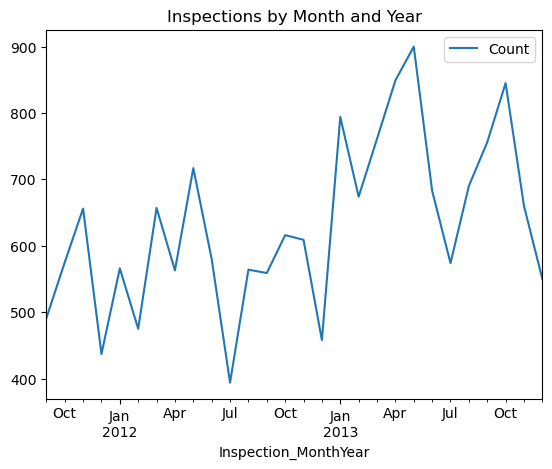

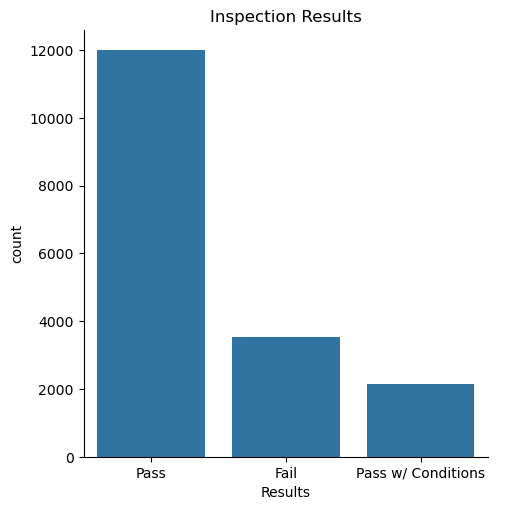

In [11]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

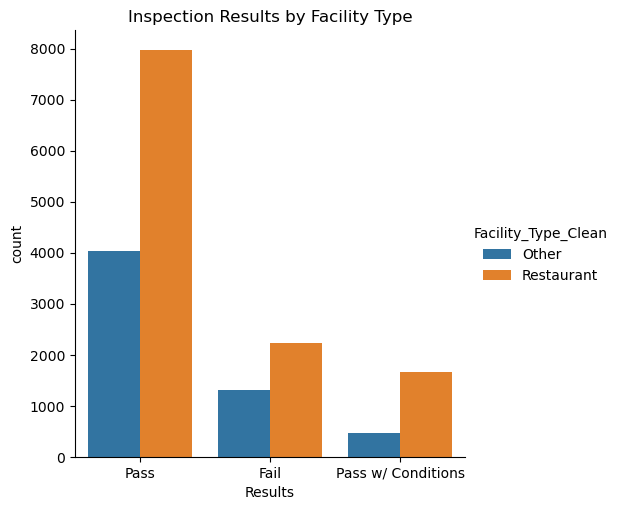

In [12]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

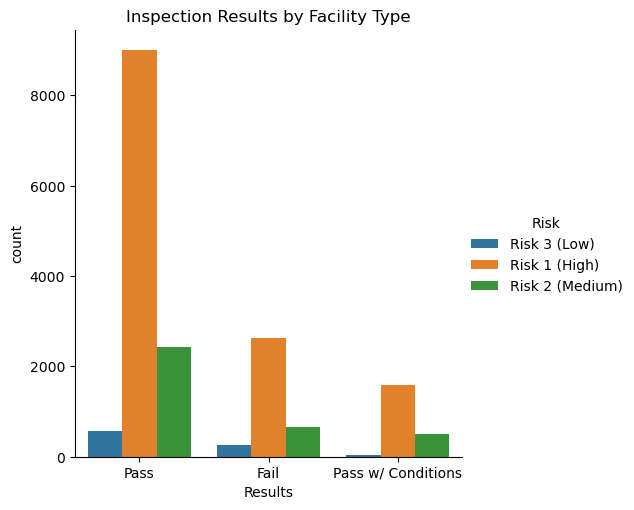

In [13]:
# view inspection results by Risk? 
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Risk')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [14]:
# checking data types of my variables to see if i need to do anything before i train the model
chicago_inspections_2011_to_2013.dtypes


Inspection_Date                                datetime64[ns]
Facility_Type                                          object
Risk                                                   object
Inspection_Type                                        object
Results                                                object
Facility_Type_Clean                                    object
criticalCount                                           int64
seriousCount                                            int64
minorCount                                              int64
pastFail                                                int64
pastCritical                                            int64
pastSerious                                             int64
pastMinor                                               int64
timeSinceLast                                         float64
firstRecord                                             int64
WARD_PRECINCT                                          object
POLICE_D

In [15]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [16]:
chicago_inspections_2011_to_2013['Risk'].unique()

array(['Risk 3 (Low)', 'Risk 1 (High)', 'Risk 2 (Medium)'], dtype=object)

In [17]:
#Let's order the Risk from 1 to 3, where Risk 1 is the highest Risk

risk_mapping = {
    "Risk 1 (High)": 1,
    "Risk 2 (Medium)": 2,
    "Risk 3 (Low)": 3
}

chicago_inspections_2011_to_2013['Risk_ordinal'] = \
    chicago_inspections_2011_to_2013['Risk'].map(risk_mapping)

In [18]:
#and take a look at what we did 
chicago_inspections_2011_to_2013[['Risk', 'Risk_ordinal']].head()

,,Risk,Risk_ordinal
Inspection_ID,DBA_Name,,
269961,SEVEN STAR,Risk 3 (Low),3
507211,PANERA BREAD,Risk 1 (High),1
507212,LITTLE QUIAPO RESTAURANT,Risk 1 (High),1
507216,SERGIO'S TAQUERIA PIZZA INC.,Risk 1 (High),1
507219,TARGET STORE # T-2079,Risk 2 (Medium),2


In [19]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
#Let's binarize the outcome variable so we can use Lasso later + make it easier to classify between the two categories that we effectively care about
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [20]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_ordinal,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,3,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,2,False,True,False,True,False,True,False,False,False,True


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15311 entries, (np.int64(269961), 'SEVEN STAR') to (np.int64(1493801), 'SODEXHO')
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   criticalCount                                15311 non-null  int64  
 1   seriousCount                                 15311 non-null  int64  
 2   minorCount                                   15311 non-null  int64  
 3   pastFail                                     15311 non-null  int64  
 4   pastCritical                                 15311 non-null  int64  
 5   pastSerious                                  15311 non-null  int64  
 6   pastMinor                                    15311 non-null  int64  
 7   timeSinceLast                                15311 non-null  float64
 8   firstRecord                                  15311 non-null  int64  
 9   POLICE_DISTRICT 

In [22]:
#Let's drop the Risk feature that we don't need (because we made an ordinal one)
X = X.drop(columns=['Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)'])

In [23]:
#Let's standardize the features that are continuous numbers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['criticalCount', 'seriousCount', 'minorCount',
   'pastFail', 'pastCritical', 'pastSerious', 'pastMinor',
   'timeSinceLast', 'ageAtInspection',
   'precipIntensity', 'temperatureMax', 'windSpeed', 'humidity',
   'heat_burglary', 'heat_garbage', 'heat_sanitation']] = scaler.fit_transform(
       X[['criticalCount', 'seriousCount', 'minorCount',
          'pastFail', 'pastCritical', 'pastSerious', 'pastMinor',
          'timeSinceLast', 'ageAtInspection',
          'precipIntensity', 'temperatureMax', 'windSpeed', 'humidity',
          'heat_burglary', 'heat_garbage', 'heat_sanitation']]
)

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1

In [24]:
#First model will be LASSO because it is good at handling at lot of features and selecting the most predictive; Also, is good at preventing overfitting

#Start by splitting the data
# Set seed
np.random.seed(10)

# training and test split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20,
                                                    stratify=y)

# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = y_train)

#Create the model
logit_model = LogisticRegression()

#Set parameters
param_grid_lasso = {'penalty': ['l1'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}

#Grid search
grid_logreg = GridSearchCV(logit_model, param_grid_lasso, cv=3)
grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'fit_intercept': [True, False], 'penalty': ['l1'],
                         'solver': ['liblinear', 'saga']})

###  Model 2

In [25]:
#Second model is random forests because it's also good at handling a range of different features, and is good at avoiding overfitting. 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

np.random.seed(10)

# Initialize a Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=10)

#Hyperparameters - we are switching to random search because it took way too long to run through all the combinations
param_dist_rf = {
    'n_estimators': randint(100, 300),         #number of trees
    'max_depth': [None, 5, 10, 20],           #depth of trees
    'min_samples_split': randint(2, 11),       #minimum number of samples to split node
    'min_samples_leaf': randint(1, 5),         #minimum number of samples at leaf
    'max_features': ['sqrt', 'log2', None] 
}

#Let's do the random search
rf_random = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=3,
    random_state=10
)

#Fit traning data
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30b589bd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30b589950>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30b536cf0>},
                   random_state=10)

### Model 3

In [26]:
#Last model is Adaboost because it can improve predictive power of ML model
from sklearn.ensemble import AdaBoostClassifier

#Set seed and make model
np.random.seed(10)
ada_model = AdaBoostClassifier(random_state=10)

#Hyperparameter
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1.0, 1.5]
}

#gridsearch
ada_grid = GridSearchCV(ada_model, param_grid_ada, cv=3)
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=10),
             param_grid={'learning_rate': [0.5, 1.0, 1.5],
                         'n_estimators': [50, 100, 200]})

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

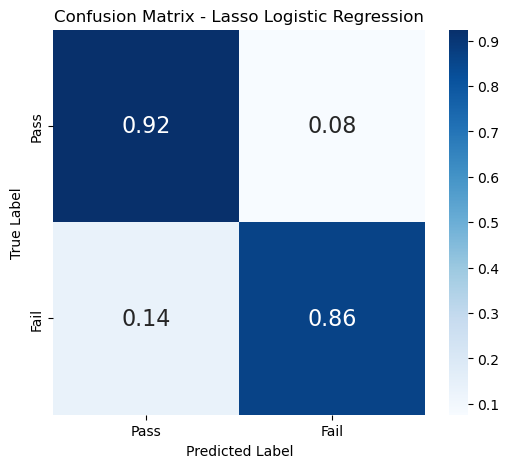

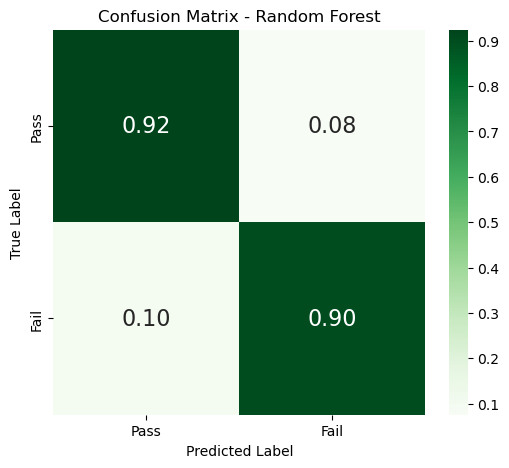

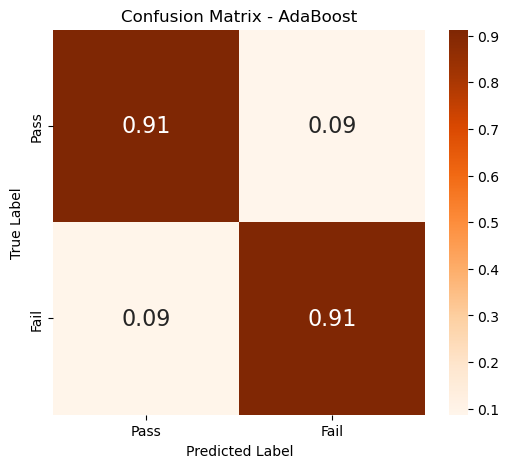

In [27]:
#Start by looking at our models with confusion matrices
#Lasso
y_val_pred_logit = grid_logreg.best_estimator_.predict(X_validate)
cf_matrix_logit = confusion_matrix(y_validate, y_val_pred_logit, normalize='true')

df_cm_logit = pd.DataFrame(cf_matrix_logit, index=["Pass", "Fail"], columns=["Pass", "Fail"])

plt.figure(figsize=(6,5))
sns.heatmap(df_cm_logit, annot=True, fmt=".2f", cmap="Blues", annot_kws={"size":16})
plt.title("Confusion Matrix - Lasso Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#Random forest
y_val_pred_rf = rf_random.best_estimator_.predict(X_validate)
cf_matrix_rf = confusion_matrix(y_validate, y_val_pred_rf, normalize='true')

df_cm_rf = pd.DataFrame(cf_matrix_rf, index=["Pass", "Fail"], columns=["Pass", "Fail"])

plt.figure(figsize=(6,5))
sns.heatmap(df_cm_rf, annot=True, fmt=".2f", cmap="Greens", annot_kws={"size":16})
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#Adaboost
y_val_pred_ada = ada_grid.best_estimator_.predict(X_validate)
cf_matrix_ada = confusion_matrix(y_validate, y_val_pred_ada, normalize='true')

df_cm_ada = pd.DataFrame(cf_matrix_ada, index=["Pass", "Fail"], columns=["Pass", "Fail"])

plt.figure(figsize=(6,5))
sns.heatmap(df_cm_ada, annot=True, fmt=".2f", cmap="Oranges", annot_kws={"size":16})
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [28]:
#It looks like LASSO has the highest false negative rate
#isn't great at predicting whether an applicant will fail 
#and will be overly optimistic predicting a Pass when the applicant actually fails

#Random Forest is more "optimistic" than AdaBoost but better at predicting actual Pass
#Adaboost model is the most balanced and has the same rate of for True Positives as for True Negatives

In [29]:
#Let's calculate validation metrics using a loop
#Import cross val score and scorer functions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

#Define scorers
scorers = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1": make_scorer(f1_score)
}

#Call our models
models = {
    "Logistic Regression (LASSO)": grid_logreg.best_estimator_,
    "Random Forest": rf_random.best_estimator_,
    "AdaBoost": ada_grid.best_estimator_
}

#Ask for the metrics for each model, using a loop 
for name, model in models.items():
    print(name)
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
        print(metric_name, scores.mean())
    print()

Logistic Regression (LASSO)
Accuracy 0.9237967234982998
Precision 0.7721564877293747
Recall 0.8844219421577911
F1 0.8238499584227672

Random Forest
Accuracy 0.9265187895057643
Precision 0.765359369575531
Recall 0.9173803453048736
F1 0.8343795343161133

AdaBoost
Accuracy 0.9197696011676321
Precision 0.7414957800888275
Recall 0.9260056822320972
F1 0.8230991192591451



In [30]:
#Overall, Random Forest looks to be the best model because it has the best F1 score and very good recall (compared to AdaBoost which is only a teeny bit better)
#It is the most accurate model. 

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

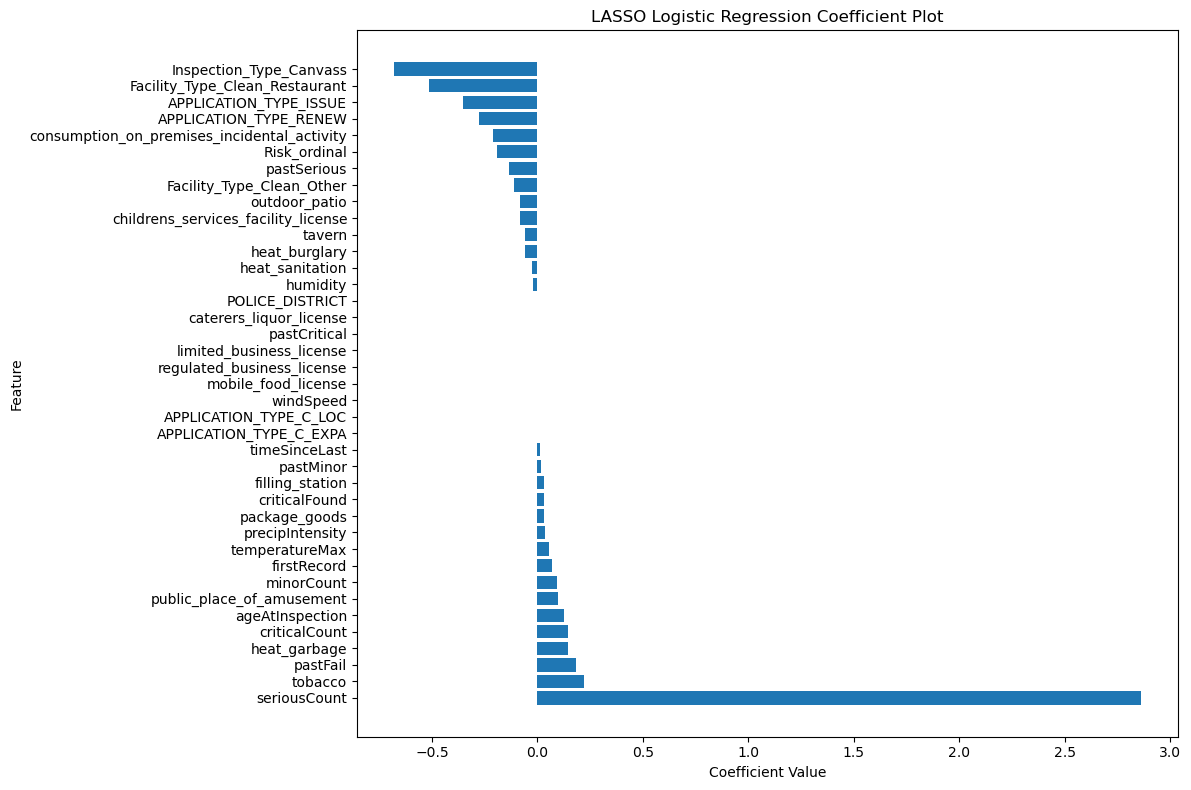

In [31]:
#Coefficient plot for Lasso model

logreg = grid_logreg.best_estimator_

coef = logreg.coef_.flatten()
features = X.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title("LASSO Logistic Regression Coefficient Plot")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

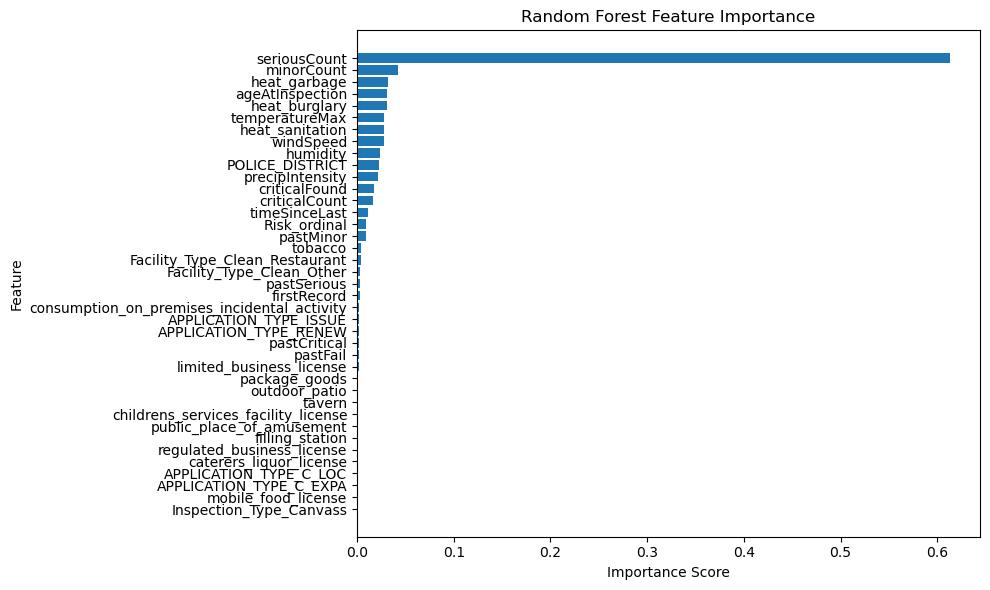

In [32]:
#Coefficient plot for Random forest
rf = rf_random.best_estimator_

importances_rf = rf.feature_importances_
rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf})
rf_df = rf_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(rf_df['Feature'], rf_df['Importance'])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

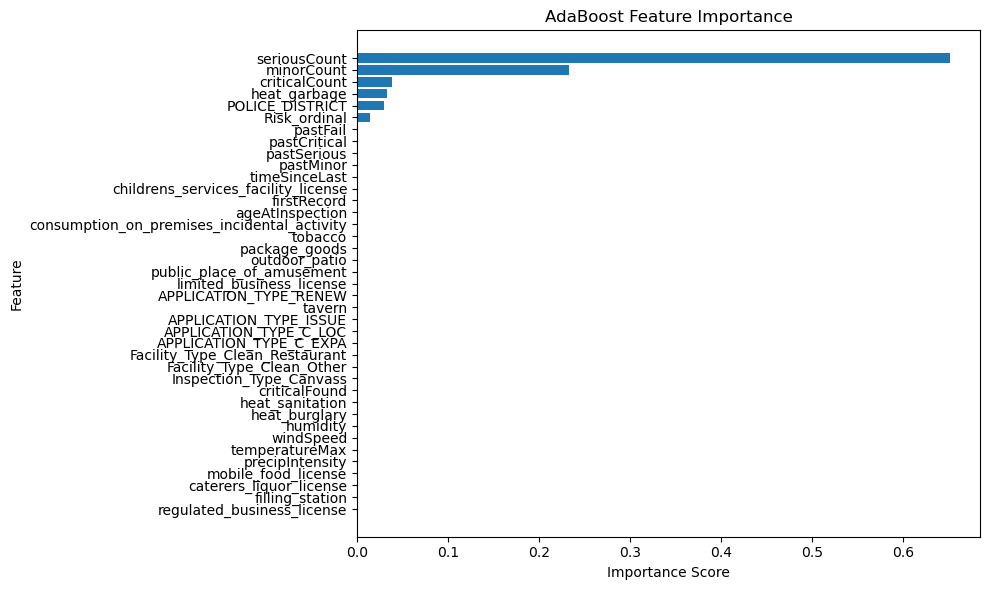

In [33]:
#Same for Adaboost

ada = ada_grid.best_estimator_

importances_ada = ada.feature_importances_
ada_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_ada})
ada_df = ada_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(ada_df['Feature'], ada_df['Importance'])
plt.title("AdaBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [34]:
#Let's look at the 3 top predictors for each model

#LASSO : (1) SeriousCount (2) InspectionTypeCANVASS (3) FacilityTypeClean
#Random Forest : (1) SeriousCount (2) MinorCount (3) heat_garbage
#Adaboost: (1) SeriousCount (2) minorcount (3) critical count

#Adaboost is sensitive to some important things like critical violations to predict a Failed inspection
#Even though there would be fewer occurrences of that, which is good.

#RandomForest still captures the serious and minor violations thing (misses the impact of having
#had a critical violation before final inspection result was adjudicated). But it still looks like
#a well suited model based on the metrics we calculated before. 

#We could have maybe predicted this better by knowing whether some of these facilities have
#Food safety training for their employees, or how experienced the managers are 
#Maybe knowing whether these establishments are part of a restaurant or hospitality group or chain
#who therefore would have more systematic processes in place, or if they are independently-owned

#On the flip side, knowing more about the inspections officer could be helpful 
#Are certain inspectors, based on their experience or on their field office, more or less lenient on food inspections? 

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [35]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
#We're choosing random forest 
best_model = rf_random.best_estimator_

#predict the result of the inspection
y_pred = best_model.predict(X)

#and the probability of failing the inspection
y_prob = best_model.predict_proba(X)[:, 1]

results = X.copy()
results["true_outcome"] = y
results["pred_fail_prob"] = y_prob
results["pred_label"] = y_pred


In [36]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
#asking for the results in order
results_sorted = results.sort_values("pred_fail_prob", ascending=False)

top_1000 = results_sorted.head(1000)


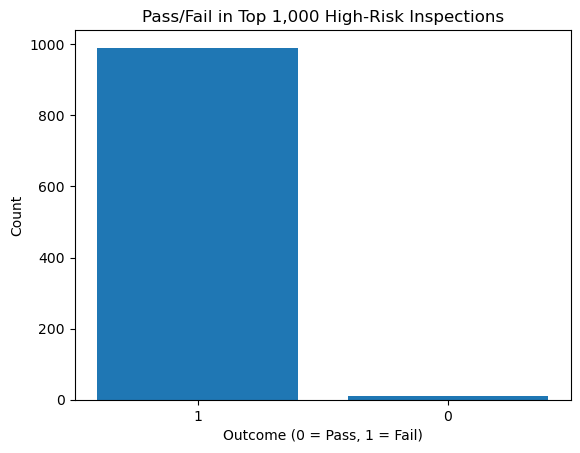

In [37]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
import matplotlib.pyplot as plt

top_counts = top_1000["true_outcome"].value_counts()

plt.bar(top_counts.index.astype(str), top_counts.values)
plt.title("Pass/Fail in Top 1,000 High-Risk Inspections")
plt.xlabel("Outcome (0 = Pass, 1 = Fail)")
plt.ylabel("Count")
plt.show()


In [38]:
unique, counts = np.unique(y, return_counts=True)
print(unique, counts / counts.sum())

[0 1] [0.79838025 0.20161975]


In [39]:
print(top_1000["true_outcome"].value_counts())

true_outcome
1    990
0     10
Name: count, dtype: int64


In [40]:
#Out of the riskiest applications, 99% of those facilities actually failed their inspection

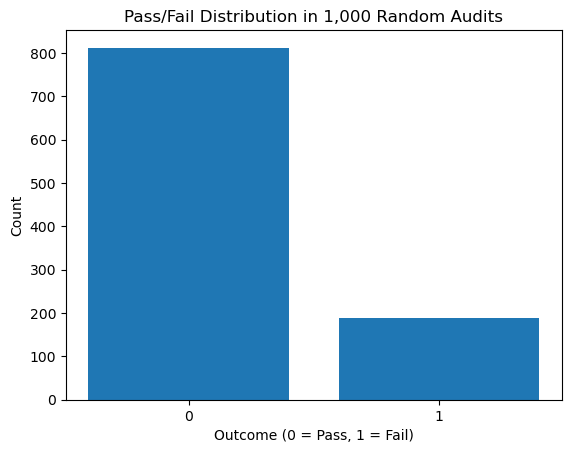

In [41]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

plt.bar(
    results.sample(1000, random_state=10)["true_outcome"].value_counts().index.astype(str),
    results.sample(1000, random_state=10)["true_outcome"].value_counts().values
)
plt.title("Pass/Fail Distribution in 1,000 Random Audits")
plt.xlabel("Outcome (0 = Pass, 1 = Fail)")
plt.ylabel("Count")
plt.show()



### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [49]:
chicago_inspections_2014.columns

Index(['Inspection_ID', 'DBA_Name', 'AKA_Name', 'License', 'Facility_Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection_Type',
       'Latitude', 'Longitude', 'Location', 'Facility_Type_Clean',
       'criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY',
       'LICENSE_NUMBER', 'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'ch

In [51]:
# data processing
# ----------- 

#dropping the date time information we dropped in the older dataset
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(
    ['Inspection_Date', 'minDate', 'maxDate'],
    axis=1,
    errors='ignore'
)
#Order Risk from Low to High like we did previously
chicago_inspections_2014['Risk_ordinal'] = \
    chicago_inspections_2014['Risk'].map(risk_mapping)

# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns=[
    'AKA_Name', 'License', 'Address', 'City', 'State', 'Zip',
    'Latitude', 'Longitude', 'Location', 'ID', 'LICENSE_ID',
    'LICENSE_TERM_START_DATE', 'LICENSE_TERM_EXPIRATION_DATE',
    'LICENSE_STATUS', 'ACCOUNT_NUMBER', 'LEGAL_NAME',
    'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE',
    'ZIP_CODE', 'WARD', 'PRECINCT', 'LICENSE_CODE',
    'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
    'LATITUDE', 'LONGITUDE'
], inplace=True)


# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

# process features
X_test2014 = chicago_inspections_2014.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X_test2014 = pd.get_dummies(X_test2014)

# process target 
y_test2014 = chicago_inspections_2014['Results']

#Let's binarize the outcome variable
# -----------
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer(pos_label=1, neg_label=0)
y_test2014 = lb_style.fit_transform(y_test2014).ravel()

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)

In [53]:
#Drop the extra Risk feature now that we have the ordinal one
# Drop one-hot Risk columns if they exist
X_test2014 = X_test2014.drop(columns=['Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)'],
                             errors='ignore')  # safely ignore if they don't exist


In [54]:
# predict and compare 
# -----------
#Predict Fail/Pass
y_pred_2014 = rf_random.predict(X_test2014)

#Probability of Fail
y_prob_2014 = rf_random.predict_proba(X_test2014)[:, 1]

#Metrics
print("Accuracy:", accuracy_score(y_test2014, y_pred_2014))
print("Precision:", precision_score(y_test2014, y_pred_2014))
print("Recall:", recall_score(y_test2014, y_pred_2014))
print("F1:", f1_score(y_test2014, y_pred_2014))
print("Confusion Matrix:\n", confusion_matrix(y_test2014, y_pred_2014))


Accuracy: 0.8983538019336295
Precision: 0.6772946859903382
Recall: 0.9272486772486772
F1: 0.7828029034059185
Confusion Matrix:
 [[2737  334]
 [  55  701]]


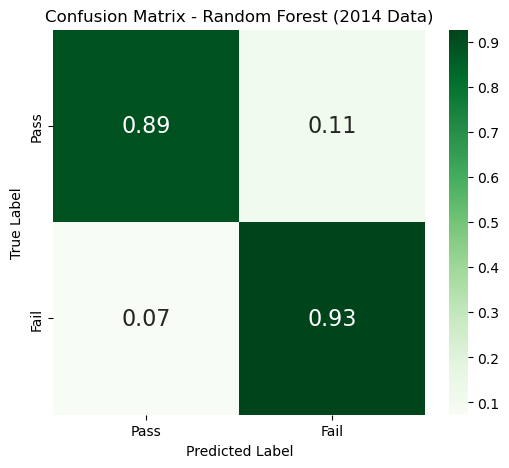

In [55]:
#Predict on 2014 data
y_pred_2014 = rf_random.best_estimator_.predict(X_test2014)

#Confusion matrix (normalized)
cf_matrix_2014 = confusion_matrix(y_test2014, y_pred_2014, normalize='true')
df_cm_2014 = pd.DataFrame(cf_matrix_2014, index=["Pass", "Fail"], columns=["Pass", "Fail"])

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df_cm_2014, annot=True, fmt=".2f", cmap="Greens", annot_kws={"size":16})
plt.title("Confusion Matrix - Random Forest (2014 Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# evaluate
# -----------
#All of our metrics dropped except for Recall. 
#The Accuracy dropped from .92 to .89 which is to be expected because we are using a different dataset with different distribution
#Precision dropped more from .76 to .67 which means that our model was pessimistic when predicting whether an establishment would pass or fail the inspection
#But the model is doing better at catching the true Fails (Recall went up from .91 to .93)

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


Accuracy is an important metric but it doesn't reflect the cases we're trying to catch when we use data science for public policy. For example, in this exercise, we're trying to predict a rare case of establishments FAILING the inspection. It's important to have good Recall in those cases, especially when we're trying to "catch" rare cases of a negative event. At the same time, having good precision metrics is important to avoid wasting resources or over-burdening a certain population that may be over-represented in the negative events.

In public policy and in social sciences, we're often dealing with allocation of public funds and are directly impacting the lives of people. It's important to use mixed methods and to continue working with local workers as well as people who are knowledge in the specific type of policy question to avoid treating people and cases unfairly.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

If establishments learn how an algorithm determines audits, they can adjust their behavior to avoid getting flagged for inspection. This is only a problem if the establishments aren't making genuine change or improvement, but simply trying to artificially game the metrics. We can try to incorporate metrics that are difficult to game or manipulate or keep some of the metrics confidential. If, for the sake of openness and transparency, we have to publish the metrics and the algorithm that selects establishments for inspection, we can try to add another layer to selection process. For example, we could ensure that every establishment is audited at least once every three years regardless of the model’s predictions. Alternatively, we can leave a part of inspections up to randomization. Finally, updating the model regularly should help with our problem. 

Ultimately, one of the goals of this type of evaluation policy is to keep a safety standard and give businesses the opportunity to reach such a standard. Making sure that inspections are followed by a clear explanation of what can be improved would give establishments that Fail or Pass with Conditions easy steps to follow to succeed in the next inspection... which would likely require less convoluted work than trying to game the algorithm. 